Выбран датасет taxi_trip_pricing.csv

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


file_path = './taxi_trip_pricing.csv'
df = pd.read_csv(file_path)

# Просмотр первых строк и общей информации о данных


display(df.head(10))
df_info = df.info()
df.describe(), df.columns, df_info


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


(       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
 count        950.000000       950.000000  950.000000   950.000000   
 mean          27.070547         2.476842    3.502989     1.233316   
 std           19.905300         1.102249    0.870162     0.429816   
 min            1.230000         1.000000    2.010000     0.500000   
 25%           12.632500         1.250000    2.730000     0.860000   
 50%           25.830000         2.000000    3.520000     1.220000   
 75%           38.405000         3.000000    4.260000     1.610000   
 max          146.067047         4.000000    5.000000     2.000000   
 
        Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  
 count       950.000000             950.000000  951.000000  
 mean          0.292916              62.118116   56.874773  
 std           0.115592              32.154406   40.469791  
 min           0.100000               5.010000    6.126900  
 25%           0.190000              35.882500   33.742650  
 5

Убираем пропуски в датафрейме, заполняя их медианными значениями

In [49]:
for col in ['Trip_Distance_km', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']:
    df[col] = df[col].fillna(df[col].median())

for col in ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather', 'Passenger_Count']:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())
display(df.head(10))

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.52,0.62,0.43,40.57,50.0745
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,0.29,5.05,11.2645
7,43.44,Evening,Weekend,3.0,Low,Clear,2.97,1.87,0.23,61.86,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,50.0745
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,61.86,75.5657


Зависимость цены поездки от расстояния и трафика

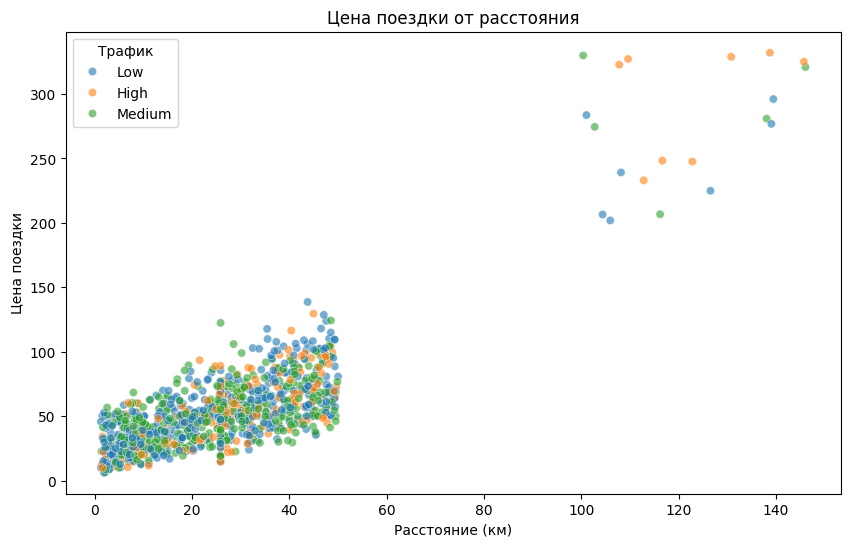

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Trip_Distance_km', y='Trip_Price', alpha=0.6, hue='Traffic_Conditions')
plt.title('Цена поездки от расстояния')
plt.xlabel('Расстояние (км)')
plt.ylabel('Цена поездки')
plt.legend(title='Трафик')
plt.show()

Зависимость цены от времени поездки

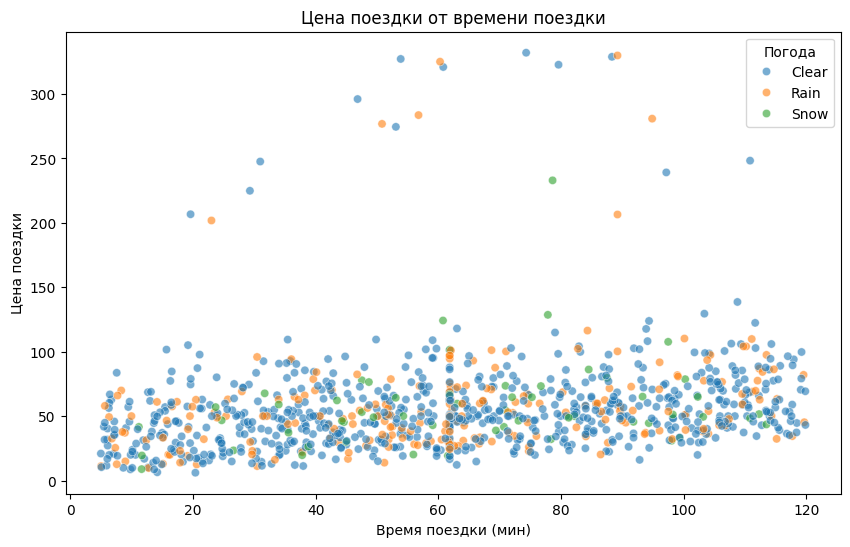

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Trip_Duration_Minutes', y='Trip_Price', alpha=0.6, hue='Weather')
plt.title('Цена поездки от времени поездки')
plt.xlabel('Время поездки (мин)')
plt.ylabel('Цена поездки')
plt.legend(title='Погода')
plt.show()

Влияние условий трафика на цену поездки

In [52]:
traffic_price_means = df.groupby('Traffic_Conditions')['Trip_Price'].mean()
print(traffic_price_means)

Traffic_Conditions
High      64.236158
Low       55.223831
Medium    54.354520
Name: Trip_Price, dtype: float64


Влияние погоды на цену поездки

In [53]:
weather_price_means = df.groupby('Weather')['Trip_Price'].mean()
print(weather_price_means)

Weather
Clear    55.579685
Rain     59.299470
Snow     57.677603
Name: Trip_Price, dtype: float64


Влияние времени суток и дня недели на цену поездки

In [54]:
time_day_price_means = df.groupby(['Time_of_Day', 'Day_of_Week'])['Trip_Price'].mean().unstack()
print(time_day_price_means)


Day_of_Week    Weekday    Weekend
Time_of_Day                      
Afternoon    58.575499  55.040244
Evening      56.509803  55.430609
Morning      56.565699  52.727985
Night        55.307113  57.302059


Гипотеза: Цена поездки (Trip_Price) и расстояние (Trip_Distance_km) линейно связаны.
Нулевая гипотеза (H₀): Нет линейной связи между Trip_Price и Trip_Distance_km.
Альтернативная гипотеза (H₁): Существует линейная связь между Trip_Price и Trip_Distance_km.

In [55]:
correlation, p_value = stats.pearsonr(df['Trip_Distance_km'], df['Trip_Price'])

print(f'Коэффициент корреляции Пирсона: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Интерпретация результата
if p_value < 0.05:
    print("Нулевая гипотеза отвергается. Есть линейная связь.")
else:
    print("Не удалось отвергнуть нулевую гипотезу. Нет линейной связи.")

Коэффициент корреляции Пирсона: 0.83
P-value: 0.0000
Нулевая гипотеза отвергается. Есть линейная связь.
